In [78]:
import pandas as pd

reports = pd.read_table('osha.txt', header=None, names=["ID", "Title", "Content"])

reports['Text'] = reports['Title'] + '. ' + reports['Content']


In [80]:
reports.head()

,ID,Title,Content,Text
0,201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...,Employee Is Burned By Forklift Radiator Fluid...
1,202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...,Employee Falls From Flatbed Trailer And Later...
2,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,Two Workers Are Struck By Motor Vehicle And O...
3,200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...,Employee Is Struck By Bales Of Wire And Kille...
4,201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...,Employee Is Splashed With Hot Water And Is Bu...


In [7]:
from nltk.corpus import wordnet


In [64]:
def get_syno_names(input_text):
    synoset_raw = wordnet.synsets(input_text, pos = wordnet.NOUN)
    result_set = set()
    for item in synoset_raw:
        for sub_item in item.hyponyms():
            for lemma in sub_item.lemmas():
                result_set.add(lemma.name())

    return result_set

In [162]:
occu_set = get_syno_names('worker')|get_syno_names('employee')
occu_set.remove('employee')
occu_set.remove('independent')
occu_set.remove('help')
print(occu_set)

{'stage_technician', 'pruner', 'boater', 'comber', 'toll_agent', 'nailer', 'trainman', 'caster', 'free_lance', 'sheller', 'tier_up', 'deliverer', 'potboy', 'shingler', 'splicer', 'driver', 'bleacher', 'registrar', 'bartender', 'dispatcher', 'scrubber', 'hireling', 'hire', 'seasonal', 'peeler', 'solderer', 'staff_member', 'Pullman_porter', 'soldier', 'muzzler', 'cornhusker', 'oiler', 'delivery_boy', 'busy_bee', 'powerhouse', 'fireball', 'toller', 'shoveller', 'jobholder', 'winder', 'ball_of_fire', 'supporter', 'seasonal_worker', 'trained_worker', 'quarrier', 'crewman', 'poster', 'boatman', 'thrower', 'toll_collector', 'temporary_worker', 'mopper', 'sweeper', 'self-employed_person', 'servant', 'twiner', 'office_boy', 'stemmer', 'employable', 'accumulator', 'waterman', 'blackleg', 'whiz-kid', 'throwster', 'animator', 'railwayman', 'vitalizer', 'company_man', 'man_of_deeds', 'part-timer', 'plyer', 'striver', 'stripper', 'teaser', 'railroader', 'lamplighter', 'trimmer', 'railway_man', 'toll

In [170]:
bodypart_set = get_syno_names('body_part')
bodypart_set.remove('system')
bodypart_set.remove('small')
bodypart_set.remove('behind')
bodypart_set.remove('area')
bodypart_set.remove('process')
bodypart_set.remove('structure')
print(bodypart_set)

{'bum', 'fanny', 'body_structure', 'annexa', 'tissue', 'feature', 'fundament', 'protoplast', 'trunk', 'derriere', 'posterior', 'anatomical_structure', 'croup', 'rear_end', 'cheek', 'body', 'torso', 'rump', 'articulation', 'chest', 'shank', 'lobe', 'rudiment', 'underpart', 'pectus', 'bodily_structure', 'hind_end', 'hip', 'keister', 'appendage', 'lumbus', 'buttocks', 'venter', 'stern', 'tail_end', 'joint', 'loin', 'cannon', 'belly', 'hindquarters', 'ampulla', 'region', 'nates', 'shoulder', 'apparatus', 'stomach', 'dilator', 'external_body_part', 'flank', 'energid', 'fornix', 'ambulacrum', 'can', 'back', 'abdomen', 'dorsum', 'vallecula', 'buns', 'ass', 'bottom', 'seat', 'complex_body_part', 'prat', 'lineament', 'tush', 'thorax', 'tail', 'horseback', 'gaskin', 'backside', 'shin', 'stump', 'outgrowth', 'rear', 'haunch', 'mentum', 'buttock', 'partition', 'groove', 'withers', 'arse', 'dock', 'toe', 'tooshie', 'organ', 'loins', 'saddle', 'croupe', 'adnexa', 'butt', 'articulatio', 'rectum'}


## Section 1 - Word cloud to indicate the high risk occupation and body part

In [171]:
from nltk import word_tokenize

raw_text = reports['Text'] 

occupation_full = ''
bodypart_full = ''

for value in raw_text.items():
    tokens = word_tokenize(str(value))
    for token in tokens:
        if token in occu_set:
            occupation_full = occupation_full+ token + ' '
        elif token in bodypart_set:
            bodypart_full = bodypart_full + token + ' '


In [172]:
occupation_full = " ".join(occupation_full.split())
print(occupation_full)

driver tier driver collector winder driver gutter temporary assistant temporary collector workman driver sweeper sweeper sweeper sweeper sweeper sweeper sweeper sweeper sweeper sweeper sweeper sweeper assistant driver driver driver driver driver driver driver driver helper helper driver nailer nailer temporary driver driver driver collector helper temporary finisher trimmer trimmer driver driver temporary gutter gutter assistant temporary temporary driver driver pruner pruner pruner pruner pruner pruner processor driver assistant splitter scrubber assistant assistant assistant assistant assistant driver assistant helper temporary assistant volunteer driver driver dragger hanger hanger driver temporary hanger hanger gutter temporary temporary temporary driver accumulator driver driver temporary driver driver driver sweeper sweeper sweeper sweeper sweeper sweeper sweeper driver driver driver driver driver clerk trimmer collector fireball collector collector collector fireball temporary t

In [173]:
bodypart_full = " ".join(bodypart_full.split())
print(bodypart_full)

rear back back back abdomen bottom torso back abdomen abdomen shoulder chest abdomen abdomen back abdomen back abdomen back abdomen back back back abdomen body body back butt chest abdomen apparatus buttock abdomen back back abdomen back abdomen back rear rear shoulder body body body shoulder shoulder hip can back dock stump tissue chest back chest body body body body rear rear seat saddle body back rear back back back rear back back back shoulder back bottom back bottom back back body abdomen stomach back back groove body seat rear shin dock bottom dock rear back back abdomen back back can can can toe shoulder shoulder toe body cannon back back back chest stomach torso body back chest body chest back back joint back body back back back bottom chest seat back body body bottom bottom chest chest torso back torso back back back chest body bottom back body rear rear rear back body back back chest body body torso body torso body chest abdomen back back bottom body back bottom back back che

In [145]:
#!pip install pip install wordcloud

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

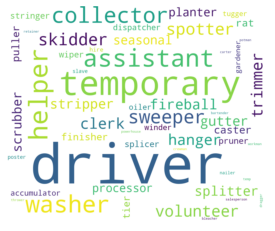

In [174]:
wordcloud_occu = WordCloud(background_color="white",
                          width=1200, height=1000,
                          collocations = False).generate(occupation_full)

# Display the generated image:
plt.imshow(wordcloud_occu, interpolation='bilinear')
plt.axis("off")
plt.show()

### From the word cloud, it shows that drivers are the occupation with highest risk

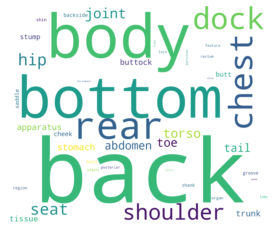

In [175]:
wordcloud_body = WordCloud(background_color="white",
                          width=1200, height=1000,
                          collocations = False).generate(bodypart_full)

# Display the generated image:
plt.imshow(wordcloud_body, interpolation='bilinear')
plt.axis("off")
plt.show()

## Generate TDM

In [198]:
# Finally, how to generate TDM

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Create a matrix using term frequency first using CountVectorizer
# The result is in sparse matrix format
vec_tf = CountVectorizer()
occu_tf = vec_tf.fit_transform(occupation_full.split())
occu_tf.toarray()



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [199]:
body_tf = vec_tf.fit_transform(bodypart_full.split())
body_tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [200]:
vec_tfidf = TfidfVectorizer(min_df=2)
body_tfidf = vec_tfidf.fit_transform(bodypart_full.split())
body_tfidf.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [201]:
occu_tfidf = vec_tfidf.fit_transform(occupation_full.split())
occu_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### From the above word cloud, body part such as back, bottom are injured the most

## Section 2 - Get Topic

In [75]:
import nltk
from nltk.corpus import stopwords

mystopwords=stopwords.words("English") + ['one', 'become', 'get', 'make', 'take']
WNlemma = nltk.WordNetLemmatizer()

def pre_process(text):
    tokens = nltk.word_tokenize(text)
    tokens=[ WNlemma.lemmatize(t.lower()) for t in tokens]
    tokens=[ t for t in tokens if t not in mystopwords]
    tokens = [ t for t in tokens if len(t) >= 3 ]
    return(tokens)

In [89]:
text = reports['Text']
data_lemmatized  = text.apply(pre_process)

In [90]:
# Use dictionary (built from corpus) to prepare a DTM (using frequency)
import logging
import gensim 
from gensim import corpora

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [110]:
# Filter off any words with document frequency less than 3, or appearing in more than 80% documents
id2word  = corpora.Dictionary(data_lemmatized )
print(id2word )
id2word.filter_extremes(no_below=3, no_above=0.8)
print(id2word )

2020-07-04 19:13:32,093 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-07-04 19:13:32,720 : INFO : built Dictionary(24758 unique tokens: ['11:30', '2013', '4:00', 'a.m.', 'air']...) from 10000 documents (total 670142 corpus positions)
2020-07-04 19:13:32,743 : INFO : discarding 15955 tokens: [('edco', 2), ('employee', 9762), ('fl-3', 1), ('h2x393s04578', 1), ('linde', 2), ('templar', 1), ('travel/through', 1), ('948', 1), ('co-axial', 1), ('hump', 1)]...
2020-07-04 19:13:32,743 : INFO : keeping 8803 tokens which were in no less than 3 and no more than 8000 (=80.0%) documents
2020-07-04 19:13:32,754 : INFO : resulting dictionary: Dictionary(8803 unique tokens: ['11:30', '2013', '4:00', 'a.m.', 'air']...)


Dictionary(24758 unique tokens: ['11:30', '2013', '4:00', 'a.m.', 'air']...)
Dictionary(8803 unique tokens: ['11:30', '2013', '4:00', 'a.m.', 'air']...)


In [111]:
corpus  = [id2word.doc2bow(d) for d in data_lemmatized]


### Determine the Best number of topics

In [112]:
from gensim.models import CoherenceModel

In [113]:
def compute_coherence_values_simple(corpus, dictionary, k):
    lda_model = gensim.models.ldamodel.LdaModel(corpus , num_topics = k,id2word = dictionary)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [115]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Validation sets
num_of_docs = len(corpus)

model_results = {
                 'Topics': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for k in topics_range:
        cv = compute_coherence_values_simple(corpus=corpus, dictionary=id2word, k=k)
        # Save the model results
        model_results['Topics'].append(k)
        model_results['Coherence'].append(cv)
        pbar.update(1)
        
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()






 ... (more hidden) ...2020-07-04 19:18:25,445 : INFO : using symmetric alpha at 0.5
2020-07-04 19:18:25,446 : INFO : using symmetric eta at 0.5
2020-07-04 19:18:25,447 : INFO : using serial LDA version on this node
2020-07-04 19:18:25,450 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 10000 documents, updating model once every 2000 documents, evaluating perplexity every 10000 documents, iterating 50x with a convergence threshold of 0.001000
2020-07-04 19:18:25,450 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-07-04 19:18:25,451 : INFO : PROGRESS: pass 0, at document #2000/10000
2020-07-04 19:18:26,669 : INFO : merging changes from 2000 documents into a model of 10000 documents
2020-07-04 19:18:26,671 : INFO : topic #0 (0.500): 0.010*"approximately" + 0.006*"truck" + 0.006*"coworker" + 0.006*"working" + 0.006*"struck" + 0.005*"hospitalized"

2020-07-04 19:18:51,720 : INFO : topic #0 (0.333): 0.009*"burn" + 0.008*"approximately" + 0.008*"fire" + 0.007*"tank" + 0.006*"coworker" + 0.006*"working" + 0.005*"hospitalized" + 0.005*"two" + 0.005*"hospital" + 0.005*"killed"
2020-07-04 19:18:51,721 : INFO : topic #1 (0.333): 0.010*"finger" + 0.010*"machine" + 0.010*"hand" + 0.010*"approximately" + 0.009*"truck" + 0.008*"left" + 0.007*"coworker" + 0.007*"right" + 0.006*"hospital" + 0.006*"hospitalized"
2020-07-04 19:18:51,722 : INFO : topic #2 (0.333): 0.012*"approximately" + 0.011*"fell" + 0.011*"fall" + 0.008*"working" + 0.007*"line" + 0.007*"killed" + 0.007*"foot" + 0.007*"ladder" + 0.006*"truck" + 0.006*"crane"
2020-07-04 19:18:51,723 : INFO : topic diff=0.556638, rho=0.500000
2020-07-04 19:18:52,996 : INFO : -7.649 per-word bound, 200.7 perplexity estimate based on a held-out corpus of 2000 documents with 117937 words
2020-07-04 19:18:52,996 : INFO : PROGRESS: pass 0, at document #10000/10000
2020-07-04 19:18:53,936 : INFO : mer

2020-07-04 19:19:15,648 : INFO : topic #3 (0.250): 0.010*"fire" + 0.009*"burn" + 0.009*"approximately" + 0.008*"hospital" + 0.007*"hospitalized" + 0.006*"two" + 0.006*"working" + 0.005*"killed" + 0.005*"burned" + 0.004*"day"
2020-07-04 19:19:15,648 : INFO : topic diff=0.518227, rho=0.447214
2020-07-04 19:19:15,650 : INFO : using ParallelWordOccurrenceAccumulator(processes=11, batch_size=64) to estimate probabilities from sliding windows
2020-07-04 19:19:30,245 : INFO : 11 accumulators retrieved from output queue
2020-07-04 19:19:30,279 : INFO : accumulated word occurrence stats for 71573 virtual documents





 ... (more hidden) ...2020-07-04 19:19:30,421 : INFO : using symmetric alpha at 0.2
2020-07-04 19:19:30,421 : INFO : using symmetric eta at 0.2
2020-07-04 19:19:30,423 : INFO : using serial LDA version on this node
2020-07-04 19:19:30,428 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 10000 documents, updating model once every 2

2020-07-04 19:19:37,329 : INFO : topic diff=0.537020, rho=0.447214
2020-07-04 19:19:37,331 : INFO : using ParallelWordOccurrenceAccumulator(processes=11, batch_size=64) to estimate probabilities from sliding windows
2020-07-04 19:19:52,068 : INFO : 11 accumulators retrieved from output queue
2020-07-04 19:19:52,107 : INFO : accumulated word occurrence stats for 71585 virtual documents





 ... (more hidden) ...2020-07-04 19:19:52,272 : INFO : using symmetric alpha at 0.16666666666666666
2020-07-04 19:19:52,272 : INFO : using symmetric eta at 0.16666666666666666
2020-07-04 19:19:52,274 : INFO : using serial LDA version on this node
2020-07-04 19:19:52,280 : INFO : running online (single-pass) LDA training, 6 topics, 1 passes over the supplied corpus of 10000 documents, updating model once every 2000 documents, evaluating perplexity every 10000 documents, iterating 50x with a convergence threshold of 0.001000
2020-07-04 19:19:52,281 : WARNING : too few updates, training might not conver

2020-07-04 19:20:13,999 : INFO : 11 accumulators retrieved from output queue
2020-07-04 19:20:14,040 : INFO : accumulated word occurrence stats for 71594 virtual documents





 ... (more hidden) ...2020-07-04 19:20:14,234 : INFO : using symmetric alpha at 0.14285714285714285
2020-07-04 19:20:14,234 : INFO : using symmetric eta at 0.14285714285714285
2020-07-04 19:20:14,236 : INFO : using serial LDA version on this node
2020-07-04 19:20:14,243 : INFO : running online (single-pass) LDA training, 7 topics, 1 passes over the supplied corpus of 10000 documents, updating model once every 2000 documents, evaluating perplexity every 10000 documents, iterating 50x with a convergence threshold of 0.001000
2020-07-04 19:20:14,243 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-07-04 19:20:14,244 : INFO : PROGRESS: pass 0, at document #2000/10000
2020-07-04 19:20:15,487 : INFO : merging changes from 2000 doc

 ... (more hidden) ...2020-07-04 19:20:36,199 : INFO : using symmetric alpha at 0.125
2020-07-04 19:20:36,200 : INFO : using symmetric eta at 0.125
2020-07-04 19:20:36,202 : INFO : using serial LDA version on this node
2020-07-04 19:20:36,210 : INFO : running online (single-pass) LDA training, 8 topics, 1 passes over the supplied corpus of 10000 documents, updating model once every 2000 documents, evaluating perplexity every 10000 documents, iterating 50x with a convergence threshold of 0.001000
2020-07-04 19:20:36,211 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-07-04 19:20:36,212 : INFO : PROGRESS: pass 0, at document #2000/10000
2020-07-04 19:20:37,441 : INFO : merging changes from 2000 documents into a model of 10000 documents
2020-07-04 19:20:37,446 : INFO : topic #5 (0.125): 0.009*"approximately" + 0.008*"killed" + 0.006*"coworker" + 0.006*"left" + 0.006*"working" + 0.006*"hand" + 0.005*"

2020-07-04 19:20:58,031 : INFO : running online (single-pass) LDA training, 9 topics, 1 passes over the supplied corpus of 10000 documents, updating model once every 2000 documents, evaluating perplexity every 10000 documents, iterating 50x with a convergence threshold of 0.001000
2020-07-04 19:20:58,032 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-07-04 19:20:58,032 : INFO : PROGRESS: pass 0, at document #2000/10000
2020-07-04 19:20:59,275 : INFO : merging changes from 2000 documents into a model of 10000 documents
2020-07-04 19:20:59,280 : INFO : topic #5 (0.111): 0.010*"approximately" + 0.007*"working" + 0.007*"left" + 0.006*"machine" + 0.006*"area" + 0.006*"hospitalized" + 0.006*"hand" + 0.005*"air" + 0.005*"hospital" + 0.005*"killed"
2020-07-04 19:20:59,281 : INFO : topic #8 (0.111): 0.010*"approximately" + 0.009*"machine" + 0.008*"truck" + 0.007*"fall" + 0.007*"foot" + 0.007*"working" + 0

2020-07-04 19:21:20,357 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-07-04 19:21:20,358 : INFO : PROGRESS: pass 0, at document #2000/10000
2020-07-04 19:21:21,580 : INFO : merging changes from 2000 documents into a model of 10000 documents
2020-07-04 19:21:21,585 : INFO : topic #4 (0.100): 0.011*"approximately" + 0.007*"working" + 0.007*"left" + 0.006*"area" + 0.006*"hand" + 0.005*"hospitalized" + 0.005*"two" + 0.005*"struck" + 0.005*"injured" + 0.005*"coworker"
2020-07-04 19:21:21,586 : INFO : topic #9 (0.100): 0.010*"forklift" + 0.010*"approximately" + 0.008*"coworker" + 0.007*"truck" + 0.006*"boom" + 0.006*"hospital" + 0.006*"killed" + 0.005*"working" + 0.005*"struck" + 0.005*"two"
2020-07-04 19:21:21,586 : INFO : topic #5 (0.100): 0.014*"machine" + 0.009*"truck" + 0.007*"hospitalized" + 0.007*"working" + 0.006*"hospital" + 0.006*"approximately" + 0.006*"finger" + 0.006*"coworker" + 0.006*"s

In [116]:
print(model_results)

{'Topics': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'Coherence': [0.2943943835596742, 0.35828893276596113, 0.33319533610855545, 0.3420865324148118, 0.3371097715945901, 0.38857695347948645, 0.3686381332871279, 0.3763354135048499, 0.37787075716388513]}


### Highest Coherence Score with 7 topics

In [117]:
lda_model = gensim.models.ldamodel.LdaModel(corpus , num_topics = 7,id2word = id2word)

lda_model.show_topics(20)

2020-07-04 19:22:42,823 : INFO : using symmetric alpha at 0.14285714285714285
2020-07-04 19:22:42,824 : INFO : using symmetric eta at 0.14285714285714285
2020-07-04 19:22:42,826 : INFO : using serial LDA version on this node
2020-07-04 19:22:42,832 : INFO : running online (single-pass) LDA training, 7 topics, 1 passes over the supplied corpus of 10000 documents, updating model once every 2000 documents, evaluating perplexity every 10000 documents, iterating 50x with a convergence threshold of 0.001000
2020-07-04 19:22:42,833 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-07-04 19:22:42,833 : INFO : PROGRESS: pass 0, at document #2000/10000
2020-07-04 19:22:44,061 : INFO : merging changes from 2000 documents into a model of 10000 documents
2020-07-04 19:22:44,065 : INFO : topic #0 (0.143): 0.012*"approximately" + 0.006*"coworker" + 0.006*"truck" + 0.006*"hospital" + 0.005*"hospitalized" + 0.005*"w

[(0,
  '0.016*"line" + 0.014*"power" + 0.011*"approximately" + 0.007*"working" + 0.007*"electric" + 0.006*"hospital" + 0.006*"saw" + 0.006*"ground" + 0.006*"shock" + 0.006*"bin"'),
 (1,
  '0.017*"burn" + 0.011*"fire" + 0.009*"tank" + 0.009*"hospitalized" + 0.008*"approximately" + 0.008*"burned" + 0.007*"hot" + 0.007*"water" + 0.006*"explosion" + 0.006*"hospital"'),
 (2,
  '0.020*"machine" + 0.016*"finger" + 0.015*"hand" + 0.009*"approximately" + 0.009*"right" + 0.008*"left" + 0.008*"press" + 0.008*"caught" + 0.007*"amputated" + 0.006*"hospitalized"'),
 (3,
  '0.014*"fall" + 0.013*"approximately" + 0.012*"ladder" + 0.011*"fell" + 0.008*"working" + 0.008*"line" + 0.008*"foot" + 0.007*"fracture" + 0.007*"roof" + 0.007*"floor"'),
 (4,
  '0.013*"coworker" + 0.010*"pump" + 0.010*"acid" + 0.009*"scaffold" + 0.008*"working" + 0.007*"approximately" + 0.007*"water" + 0.007*"fuel" + 0.006*"electric" + 0.005*"gas"'),
 (5,
  '0.016*"killed" + 0.016*"truck" + 0.016*"struck" + 0.012*"approximately" +

In [128]:
topic_dict = {0: 'electric shock', 1: 'fire burnt', 2: 'machine injury', 3: 'fall from high', 4: 'injury by coworker', 
       5: 'vehicle fatal', 6: 'vehicle injury'}

# Get the topic distribution of documents
doc_topics = lda_model.get_document_topics(corpus)
#show the topic distributions for the first 7 docs, 
for i in range(0, 7):
    print(doc_topics[i])

#Select the best topic (with highest score) for each document
from operator import itemgetter
top_topic = [ max(t, key=itemgetter(1))[0] for t in doc_topics ]
topics_perDoc = [ topic_dict[t] for t in top_topic ]


labels, counts = np.unique(topics_perDoc, return_counts=True)

res = {labels[i]: counts[i] for i in range(len(labels))} 
res

[(1, 0.4359836), (6, 0.5576663)]
[(3, 0.12193238), (5, 0.8541898)]
[(0, 0.17291372), (5, 0.81605154)]
[(0, 0.4968398), (3, 0.23024912), (5, 0.10689035), (6, 0.16293971)]
[(1, 0.764519), (4, 0.09728828), (5, 0.13409203)]
[(1, 0.8934468), (3, 0.0898792)]
[(1, 0.13599935), (3, 0.7847874), (6, 0.06448414)]


{'electric shock': 967,
 'fall from high': 1914,
 'fire burnt': 1774,
 'injury by coworker': 611,
 'machine injury': 1903,
 'vehicle fatal': 2161,
 'vehicle injury': 670}

### Finding: 
#### This data has no labels, so I could only use unsupervised approach
#### I used LDA topic modelling, and coherence score (for every possible number of topics) to determine the optimal number of topics
#### Finally, I managed to find 7 major types of accidents: 
'electric shock' , 'fall from high' , 'fire burnt' , 'injury by coworker', 'machine injury' , 'vehicle fatal' , 'vehicle injury'

#### The most common accident is "vehicle fatal", followed by "fall from high" and "machine injury"